### Feed Forward Neural Network
Activation functions

In [1]:
import numpy as np
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)

def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

def softmax_vec(z):
    """Compute softmax values for each set of scores in the vector z.
    Use this function when you use the activation function on one vector at a time"""
    e_z = np.exp(z - np.max(z))
    return e_z / np.sum(e_z)

Cost Funtion

In [2]:
# Mean Squared Error (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size

Feed Forward Neural Network Class

In [3]:
# Feed Forward Neural Network class
class FeedForwardNeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.001, regularization_param=0.01):
        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        
        # Initialize w, b
        self.weights = [np.random.normal(0, 1, (layer_sizes[i], layer_sizes[i + 1])) for i in range(len(layer_sizes) - 1)]
        self.biases = [np.zeros((1, layer_sizes[i + 1])) for i in range(len(layer_sizes) - 1)]
    
    def forward(self, X):
        activations = [X]
        zs = []
        
        for i in range(len(self.weights) - 1):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            zs.append(z)
            activations.append(sigmoid(z))
        
        # Output 
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        zs.append(z)
        activations.append(z)
        
        return activations, zs

    def backpropagation(self, X, y):
        # Prev step
        activations, zs = self.forward(X)
        
        # Gradients for w, b
        weight_gradients = [np.zeros(w.shape) for w in self.weights]
        bias_gradients = [np.zeros(b.shape) for b in self.biases]
        
        # Output layer error
        delta = mse_derivative(y, activations[-1]) * ReLU_der(zs[-1])
        
        # Backpropagation
        for i in reversed(range(len(self.weights))):
            weight_gradients[i] = np.dot(activations[i].T, delta) + self.regularization_param * self.weights[i]
            bias_gradients[i] = np.sum(delta, axis=0, keepdims=True)
            
            # Backpropagate error to previous layers (if not the first hidden layer)
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * sigmoid_der(zs[i - 1])
        
        return weight_gradients, bias_gradients

    def update_parameters(self, weight_gradients, bias_gradients):
        # GD params update
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * weight_gradients[i]
            self.biases[i] -= self.learning_rate * bias_gradients[i]

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            weight_gradients, bias_gradients = self.backpropagation(X, y)
            self.update_parameters(weight_gradients, bias_gradients)
            
            if epoch % 100 == 0:
                y_pred = self.predict(X)
                loss = mse(y, y_pred)
                print(f"Epoch {epoch}, MSE: {loss}")

    def predict(self, X):
        activations, _ = self.forward(X)
        return activations[-1]

Data test

Epoch 0, MSE: 58.287122753536536
Epoch 100, MSE: 18.764265820511508
Epoch 200, MSE: 10.583681367641129
Epoch 300, MSE: 11.598563657878174
Epoch 400, MSE: 9.724121300146777
Epoch 500, MSE: 8.18861808721103
Epoch 600, MSE: 7.016766211112866
Epoch 700, MSE: 6.053452929954086
Epoch 800, MSE: 5.2390161625225335
Epoch 900, MSE: 4.563257904805452
Epoch 1000, MSE: 4.018752578224504
Epoch 1100, MSE: 3.5841616438071395
Epoch 1200, MSE: 3.2330352854312103
Epoch 1300, MSE: 2.943291849960864
Epoch 1400, MSE: 2.6992603996720668
Epoch 1500, MSE: 2.49024528825891
Epoch 1600, MSE: 2.3087854137486654
Epoch 1700, MSE: 2.149465507121039
Epoch 1800, MSE: 2.008234185718885
Epoch 1900, MSE: 1.8820280402964733
Final MSE: 1.462942699489305


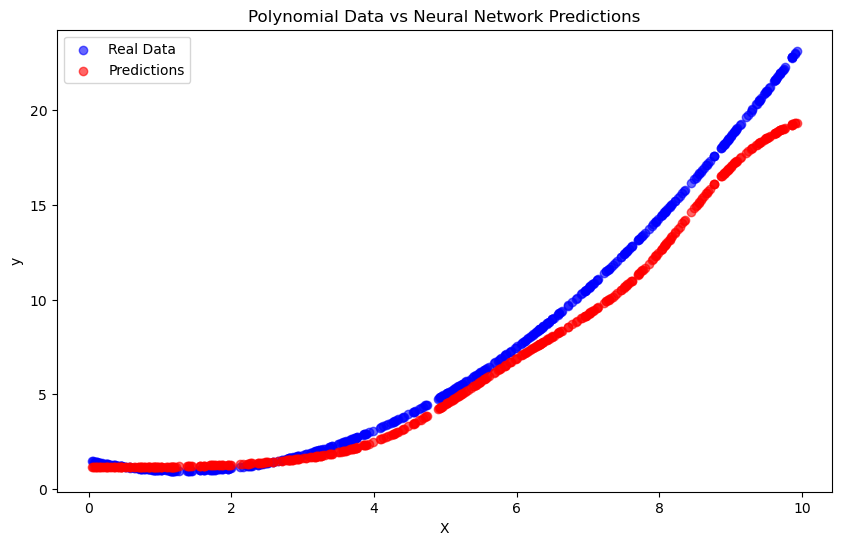

In [4]:
# Poly of second order
np.random.seed(42)
a0, a1, a2 = 1.5, -0.8, 0.3
X = np.random.rand(500, 1) *10
y = a0 + a1 * X + a2 * X**2
y = y.reshape(-1, 1)

# NN
layer_sizes = [1, 20, 20, 10, 1]
nn = FeedForwardNeuralNetwork(layer_sizes, learning_rate=0.01, regularization_param=0.001)
nn.train(X, y, epochs=2000)
y_pred = nn.predict(X)
print("Final MSE:", mse(y, y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Real Data", alpha=0.6)
plt.scatter(X, y_pred, color="red", label="Predictions", alpha=0.6)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Data vs Neural Network Predictions")
plt.legend()
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return term1 + term2 + term3 + term4

np.random.seed(42)
x = np.random.rand(1000, 1)
y = np.random.rand(1000, 1)
z = franke_function(x, y)
data = np.hstack((x, y))
z = z.reshape(-1, 1)

# NN with 2 inputs and 1 output (f(x, y))
layer_sizes = [2, 15, 15,15,15,15,15, 1]
nn_franke = FeedForwardNeuralNetwork(layer_sizes, learning_rate=0.01, regularization_param=0.01)

nn_franke.train(data, z, epochs=2000)
z_pred = nn_franke.predict(data)

Epoch 0, MSE: 0.5936802594918122
Epoch 100, MSE: 0.08211891885676122
Epoch 200, MSE: 0.08204684056246303
Epoch 300, MSE: 0.08198205012790147
Epoch 400, MSE: 0.08192455304290687
Epoch 500, MSE: 0.08187433608284722
Epoch 600, MSE: 0.08183136510965942
Epoch 700, MSE: 0.08179558342093932
Epoch 800, MSE: 0.08176691062067283
Epoch 900, MSE: 0.08174524198187584
Epoch 1000, MSE: 0.08173044826876154
Epoch 1100, MSE: 0.08172237598339714
Epoch 1200, MSE: 0.08172084799935815
Epoch 1300, MSE: 0.08172566454279735
Epoch 1400, MSE: 0.08173660447973623
Epoch 1500, MSE: 0.08175342686733185
Epoch 1600, MSE: 0.08177587272641622
Epoch 1700, MSE: 0.08180366699276359
Epoch 1800, MSE: 0.08183652060529903
Epoch 1900, MSE: 0.08187413269079445


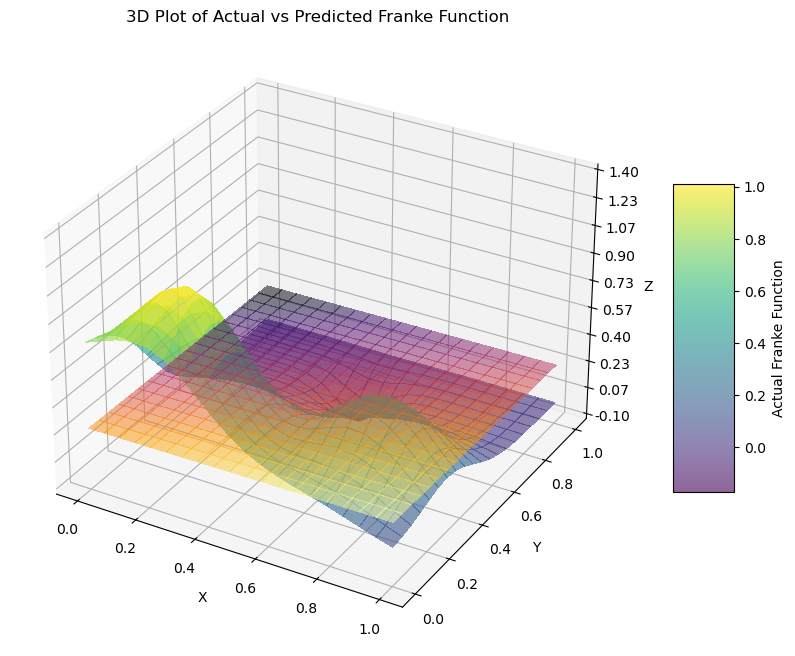

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Generate a meshgrid for surface plot
x_surf = np.linspace(0, 1, 20)
y_surf = np.linspace(0, 1, 20)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
z_surf = franke_function(x_surf, y_surf)  # Actual Franke function surface

# Reshape data for NN prediction
data_surf = np.c_[x_surf.ravel(), y_surf.ravel()]
z_pred_surf = nn_franke.predict(data_surf).reshape(x_surf.shape)  # Predicted surface

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Franke function surface (actual)
surf_actual = ax.plot_surface(x_surf, y_surf, z_surf, cmap=cm.viridis, alpha=0.6, linewidth=0, antialiased=False)

# Overlay predicted surface
surf_pred = ax.plot_surface(x_surf, y_surf, z_pred_surf, cmap=cm.inferno, alpha=0.5, linewidth=0, antialiased=False)

# Customize the z axis and labels
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_title('3D Plot of Actual vs Predicted Franke Function', fontsize=12)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add color bar for actual surface
fig.colorbar(surf_actual, shrink=0.5, aspect=5, label='Actual Franke Function')

plt.show()


### Learning Rate Methods

In [7]:
import autograd.numpy as np

class Scheduler:
    """
    Abstract class for Schedulers
    """

    def __init__(self, eta):
        self.eta = eta

    # should be overwritten
    def update_change(self, gradient):
        raise NotImplementedError

    # overwritten if needed
    def reset(self):
        pass


class Constant(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)

    def update_change(self, gradient):
        return self.eta * gradient
    
    def reset(self):
        pass


class Momentum(Scheduler):
    def __init__(self, eta: float, momentum: float):
        super().__init__(eta)
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        self.change = self.momentum * self.change + self.eta * gradient
        return self.change

    def reset(self):
        pass


class Adagrad(Scheduler):
    def __init__(self, eta):
        super().__init__(eta)
        self.G_t = None

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1))))
        return self.eta * gradient * G_t_inverse

    def reset(self):
        self.G_t = None


class AdagradMomentum(Scheduler):
    def __init__(self, eta, momentum):
        super().__init__(eta)
        self.G_t = None
        self.momentum = momentum
        self.change = 0

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        if self.G_t is None:
            self.G_t = np.zeros((gradient.shape[0], gradient.shape[0]))

        self.G_t += gradient @ gradient.T

        G_t_inverse = 1 / (delta + np.sqrt(np.reshape(np.diagonal(self.G_t), (self.G_t.shape[0], 1))))
        self.change = self.change * self.momentum + self.eta * gradient * G_t_inverse
        return self.change

    def reset(self):
        self.G_t = None


class RMS_prop(Scheduler):
    def __init__(self, eta, rho):
        super().__init__(eta)
        self.rho = rho
        self.second = 0.0

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero
        self.second = self.rho * self.second + (1 - self.rho) * gradient * gradient
        return self.eta * gradient / (np.sqrt(self.second + delta))

    def reset(self):
        self.second = 0.0


class Adam(Scheduler):
    def __init__(self, eta, rho, rho2):
        super().__init__(eta)
        self.rho = rho
        self.rho2 = rho2
        self.moment = 0
        self.second = 0
        self.n_epochs = 1

    def update_change(self, gradient):
        delta = 1e-8  # avoid division ny zero

        self.moment = self.rho * self.moment + (1 - self.rho) * gradient
        self.second = self.rho2 * self.second + (1 - self.rho2) * gradient * gradient

        moment_corrected = self.moment / (1 - self.rho**self.n_epochs)
        second_corrected = self.second / (1 - self.rho2**self.n_epochs)

        return self.eta * moment_corrected / (np.sqrt(second_corrected + delta))

    def reset(self):
        self.n_epochs += 1
        self.moment = 0
        self.second = 0

In [8]:
# # How to use them
# momentum_scheduler = Momentum(eta=1e-3, momentum=0.9)
# adam_scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)

# weights = np.ones((3,3))
# print(f"Before scheduler:\n{weights}")

# epochs = 10
# for e in range(epochs):
#     gradient = np.random.rand(3, 3)
#     change = adam_scheduler.update_change(gradient)
#     weights = weights - change
#     adam_scheduler.reset()

# print(f"\nAfter scheduler:\n{weights}")

### Cost Functions

In [9]:
import autograd.numpy as np

def CostOLS(target):
    def func(X):
        return (1.0 / target.shape[0]) * np.sum((target - X) ** 2)
    return func

def CostLogReg(target):
    def func(X):
        return -(1.0 / target.shape[0]) * np.sum((target * np.log(X + 10e-10)) + ((1 - target) * np.log(1 - X + 10e-10)))
    return func

def CostCrossEntropy(target):
    def func(X):
        return -(1.0 / target.size) * np.sum(target * np.log(X + 10e-10))
    return func

In [10]:
# # example
# from autograd import grad

# target = np.array([[1, 2, 3]]).T
# a = np.array([[4, 5, 6]]).T

# cost_func = CostCrossEntropy
# cost_func_derivative = grad(cost_func(target))

# valued_at_a = cost_func_derivative(a)
# print(f"Derivative of cost function {cost_func.__name__} valued at a:\n{valued_at_a}")

### Activation Functions

In [11]:
import autograd.numpy as np
from autograd import elementwise_grad

def identity(X):
    return X

def sigmoid(X):
    try:
        return 1.0 / (1 + np.exp(-X))
    except FloatingPointError:
        return np.where(X > np.zeros(X.shape), np.ones(X.shape), np.zeros(X.shape))

def softmax(X):
    X = X - np.max(X, axis=-1, keepdims=True)
    delta = 10e-10
    return np.exp(X) / (np.sum(np.exp(X), axis=-1, keepdims=True) + delta)

def RELU(X):
    return np.where(X > np.zeros(X.shape), X, np.zeros(X.shape))

def LRELU(X):
    delta = 10e-4
    return np.where(X > np.zeros(X.shape), X, delta * X)

def derivate(func):
    if func.__name__ == "RELU":
        def func(X):
            return np.where(X > 0, 1, 0)
        return func
    elif func.__name__ == "LRELU":
        def func(X):
            delta = 10e-4
            return np.where(X > 0, 1, delta)
        return func
    else:
        return elementwise_grad(func)

In [12]:
# z = np.array([[4, 5, 6]]).T
# print(f"Input to activation function:\n{z}")

# act_func = sigmoid
# a = act_func(z)
# print(f"\nOutput from {act_func.__name__} activation function:\n{a}")

# act_func_derivative = derivate(act_func)
# valued_at_z = act_func_derivative(a)
# print(f"\nDerivative of {act_func.__name__} activation function valued at z:\n{valued_at_z}")

### FFNN

In [13]:
import math
import autograd.numpy as np
import sys
import warnings
from autograd import grad, elementwise_grad
from random import random, seed
from copy import deepcopy, copy
from typing import Tuple, Callable
from sklearn.utils import resample

warnings.simplefilter("error")


class FFNN:
    """
    Description:
    ------------
        Feed Forward Neural Network with interface enabling flexible design of a
        nerual networks architecture and the specification of activation function
        in the hidden layers and output layer respectively. This model can be used
        for both regression and classification problems, depending on the output function.

    Attributes:
    ------------
        I   dimensions (tuple[int]): A list of positive integers, which specifies the
            number of nodes in each of the networks layers. The first integer in the array
            defines the number of nodes in the input layer, the second integer defines number
            of nodes in the first hidden layer and so on until the last number, which
            specifies the number of nodes in the output layer.
        II  hidden_func (Callable): The activation function for the hidden layers
        III output_func (Callable): The activation function for the output layer
        IV  cost_func (Callable): Our cost function
        V   seed (int): Sets random seed, makes results reproducible
    """

    def __init__(
        self,
        dimensions: tuple[int],
        hidden_func: Callable = sigmoid,
        output_func: Callable = lambda x: x,
        cost_func: Callable = CostOLS,
        seed: int = None,
    ):
        self.dimensions = dimensions
        self.hidden_func = hidden_func
        self.output_func = output_func
        self.cost_func = cost_func
        self.seed = seed
        self.weights = list()
        self.schedulers_weight = list()
        self.schedulers_bias = list()
        self.a_matrices = list()
        self.z_matrices = list()
        self.classification = None

        self.reset_weights()
        self._set_classification()

    def fit(
        self,
        X: np.ndarray,
        t: np.ndarray,
        scheduler: Scheduler,
        batches: int = 1,
        epochs: int = 100,
        lam: float = 0,
        X_val: np.ndarray = None,
        t_val: np.ndarray = None,
    ):
        """
        Description:
        ------------
            This function performs the training the neural network by performing the feedforward and backpropagation
            algorithm to update the networks weights.

        Parameters:
        ------------
            I    X (np.ndarray) : training data
            II   t (np.ndarray) : target data
            III  scheduler (Scheduler) : specified scheduler (algorithm for optimization of gradient descent)
            IV   scheduler_args (list[int]) : list of all arguments necessary for scheduler

        Optional Parameters:
        ------------
            V    batches (int) : number of batches the datasets are split into, default equal to 1
            VI   epochs (int) : number of iterations used to train the network, default equal to 100
            VII  lam (float) : regularization hyperparameter lambda
            VIII X_val (np.ndarray) : validation set
            IX   t_val (np.ndarray) : validation target set

        Returns:
        ------------
            I   scores (dict) : A dictionary containing the performance metrics of the model.
                The number of the metrics depends on the parameters passed to the fit-function.

        """

        # setup 
        if self.seed is not None:
            np.random.seed(self.seed)

        val_set = False
        if X_val is not None and t_val is not None:
            val_set = True

        # creating arrays for score metrics
        train_errors = np.empty(epochs)
        train_errors.fill(np.nan)
        val_errors = np.empty(epochs)
        val_errors.fill(np.nan)

        train_accs = np.empty(epochs)
        train_accs.fill(np.nan)
        val_accs = np.empty(epochs)
        val_accs.fill(np.nan)

        self.schedulers_weight = list()
        self.schedulers_bias = list()

        batch_size = X.shape[0] // batches

        X, t = resample(X, t)

        # this function returns a function valued only at X
        cost_function_train = self.cost_func(t)
        if val_set:
            cost_function_val = self.cost_func(t_val)

        # create schedulers for each weight matrix
        for i in range(len(self.weights)):
            self.schedulers_weight.append(copy(scheduler))
            self.schedulers_bias.append(copy(scheduler))

        print(f"{scheduler.__class__.__name__}: Eta={scheduler.eta}, Lambda={lam}")

        try:
            for e in range(epochs):
                for i in range(batches):
                    # allows for minibatch gradient descent
                    if i == batches - 1:
                        # If the for loop has reached the last batch, take all thats left
                        X_batch = X[i * batch_size :, :]
                        t_batch = t[i * batch_size :, :]
                    else:
                        X_batch = X[i * batch_size : (i + 1) * batch_size, :]
                        t_batch = t[i * batch_size : (i + 1) * batch_size, :]

                    self._feedforward(X_batch)
                    self._backpropagate(X_batch, t_batch, lam)

                # reset schedulers for each epoch (some schedulers pass in this call)
                for scheduler in self.schedulers_weight:
                    scheduler.reset()

                for scheduler in self.schedulers_bias:
                    scheduler.reset()

                # computing performance metrics
                pred_train = self.predict(X)
                train_error = cost_function_train(pred_train)

                train_errors[e] = train_error
                if val_set:
                    
                    pred_val = self.predict(X_val)
                    val_error = cost_function_val(pred_val)
                    val_errors[e] = val_error

                if self.classification:
                    train_acc = self._accuracy(self.predict(X), t)
                    train_accs[e] = train_acc
                    if val_set:
                        val_acc = self._accuracy(pred_val, t_val)
                        val_accs[e] = val_acc

                # printing progress bar
                progression = e / epochs
                print_length = self._progress_bar(
                    progression,
                    train_error=train_errors[e],
                    train_acc=train_accs[e],
                    val_error=val_errors[e],
                    val_acc=val_accs[e],
                )
        except KeyboardInterrupt:
            # allows for stopping training at any point and seeing the result
            pass

        # visualization of training progression (similiar to tensorflow progression bar)
        sys.stdout.write("\r" + " " * print_length)
        sys.stdout.flush()
        self._progress_bar(
            1,
            train_error=train_errors[e],
            train_acc=train_accs[e],
            val_error=val_errors[e],
            val_acc=val_accs[e],
        )
        sys.stdout.write("")

        # return performance metrics for the entire run
        scores = dict()

        scores["train_errors"] = train_errors

        if val_set:
            scores["val_errors"] = val_errors

        if self.classification:
            scores["train_accs"] = train_accs

            if val_set:
                scores["val_accs"] = val_accs

        return scores

    def predict(self, X: np.ndarray, *, threshold=0.5):
        """
         Description:
         ------------
             Performs prediction after training of the network has been finished.

         Parameters:
        ------------
             I   X (np.ndarray): The design matrix, with n rows of p features each

         Optional Parameters:
         ------------
             II  threshold (float) : sets minimal value for a prediction to be predicted as the positive class
                 in classification problems

         Returns:
         ------------
             I   z (np.ndarray): A prediction vector (row) for each row in our design matrix
                 This vector is thresholded if regression=False, meaning that classification results
                 in a vector of 1s and 0s, while regressions in an array of decimal numbers

        """

        predict = self._feedforward(X)

        if self.classification:
            return np.where(predict > threshold, 1, 0)
        else:
            return predict

    def reset_weights(self):
        """
        Description:
        ------------
            Resets/Reinitializes the weights in order to train the network for a new problem.

        """
        if self.seed is not None:
            np.random.seed(self.seed)

        self.weights = list()
        for i in range(len(self.dimensions) - 1):
            weight_array = np.random.randn(
                self.dimensions[i] + 1, self.dimensions[i + 1]
            )
            weight_array[0, :] = np.random.randn(self.dimensions[i + 1]) * 0.01

            self.weights.append(weight_array)

    def _feedforward(self, X: np.ndarray):
        """
        Description:
        ------------
            Calculates the activation of each layer starting at the input and ending at the output.
            Each following activation is calculated from a weighted sum of each of the preceeding
            activations (except in the case of the input layer).

        Parameters:
        ------------
            I   X (np.ndarray): The design matrix, with n rows of p features each

        Returns:
        ------------
            I   z (np.ndarray): A prediction vector (row) for each row in our design matrix
        """

        # reset matrices
        self.a_matrices = list()
        self.z_matrices = list()

        # if X is just a vector, make it into a matrix
        if len(X.shape) == 1:
            X = X.reshape((1, X.shape[0]))

        # Add a coloumn of zeros as the first coloumn of the design matrix, in order
        # to add bias to our data
        bias = np.ones((X.shape[0], 1)) * 0.01
        X = np.hstack([bias, X])

        # a^0, the nodes in the input layer (one a^0 for each row in X - where the
        # exponent indicates layer number).
        a = X
        self.a_matrices.append(a)
        self.z_matrices.append(a)

        # The feed forward algorithm
        for i in range(len(self.weights)):
            if i < len(self.weights) - 1:
                z = a @ self.weights[i]
                self.z_matrices.append(z)
                a = self.hidden_func(z)
                # bias column again added to the data here
                bias = np.ones((a.shape[0], 1)) * 0.01
                a = np.hstack([bias, a])
                self.a_matrices.append(a)
            else:
                try:
                    # a^L, the nodes in our output layers
                    z = a @ self.weights[i]
                    a = self.output_func(z)
                    self.a_matrices.append(a)
                    self.z_matrices.append(z)
                except Exception as OverflowError:
                    print(
                        "OverflowError in fit() in FFNN\nHOW TO DEBUG ERROR: Consider lowering your learning rate or scheduler specific parameters such as momentum, or check if your input values need scaling"
                    )

        # this will be a^L
        return a

    def _backpropagate(self, X, t, lam):
        """
        Description:
        ------------
            Performs the backpropagation algorithm. In other words, this method
            calculates the gradient of all the layers starting at the
            output layer, and moving from right to left accumulates the gradient until
            the input layer is reached. Each layers respective weights are updated while
            the algorithm propagates backwards from the output layer (auto-differentation in reverse mode).

        Parameters:
        ------------
            I   X (np.ndarray): The design matrix, with n rows of p features each.
            II  t (np.ndarray): The target vector, with n rows of p targets.
            III lam (float32): regularization parameter used to punish the weights in case of overfitting

        Returns:
        ------------
            No return value.

        """
        out_derivative = derivate(self.output_func)
        hidden_derivative = derivate(self.hidden_func)

        for i in range(len(self.weights) - 1, -1, -1):
            # delta terms for output
            if i == len(self.weights) - 1:
                # for multi-class classification
                if (
                    self.output_func.__name__ == "softmax"
                ):
                    delta_matrix = self.a_matrices[i + 1] - t
                # for single class classification
                else:
                    cost_func_derivative = grad(self.cost_func(t))
                    delta_matrix = out_derivative(
                        self.z_matrices[i + 1]
                    ) * cost_func_derivative(self.a_matrices[i + 1])

            # delta terms for hidden layer
            else:
                delta_matrix = (
                    self.weights[i + 1][1:, :] @ delta_matrix.T
                ).T * hidden_derivative(self.z_matrices[i + 1])

            # calculate gradient
            gradient_weights = self.a_matrices[i][:, 1:].T @ delta_matrix
            gradient_bias = np.sum(delta_matrix, axis=0).reshape(
                1, delta_matrix.shape[1]
            )

            # regularization term
            gradient_weights += self.weights[i][1:, :] * lam

            # use scheduler
            update_matrix = np.vstack(
                [
                    self.schedulers_bias[i].update_change(gradient_bias),
                    self.schedulers_weight[i].update_change(gradient_weights),
                ]
            )

            # update weights and bias
            self.weights[i] -= update_matrix

    def _accuracy(self, prediction: np.ndarray, target: np.ndarray):
        """
        Description:
        ------------
            Calculates accuracy of given prediction to target

        Parameters:
        ------------
            I   prediction (np.ndarray): vector of predicitons output network
                (1s and 0s in case of classification, and real numbers in case of regression)
            II  target (np.ndarray): vector of true values (What the network ideally should predict)

        Returns:
        ------------
            A floating point number representing the percentage of correctly classified instances.
        """
        assert prediction.size == target.size
        return np.average((target == prediction))
    def _set_classification(self):
        """
        Description:
        ------------
            Decides if FFNN acts as classifier (True) og regressor (False),
            sets self.classification during init()
        """
        self.classification = False
        if (
            self.cost_func.__name__ == "CostLogReg"
            or self.cost_func.__name__ == "CostCrossEntropy"
        ):
            self.classification = True

    def _progress_bar(self, progression, **kwargs):
        """
        Description:
        ------------
            Displays progress of training
        """
        print_length = 40
        num_equals = int(progression * print_length)
        num_not = print_length - num_equals
        arrow = ">" if num_equals > 0 else ""
        bar = "[" + "=" * (num_equals - 1) + arrow + "-" * num_not + "]"
        perc_print = self._format(progression * 100, decimals=5)
        line = f"  {bar} {perc_print}% "

        for key in kwargs:
            if not np.isnan(kwargs[key]):
                value = self._format(kwargs[key], decimals=4)
                line += f"| {key}: {value} "
        sys.stdout.write("\r" + line)
        sys.stdout.flush()
        return len(line)

    def _format(self, value, decimals=4):
        """
        Description:
        ------------
            Formats decimal numbers for progress bar
        """
        if value > 0:
            v = value
        elif value < 0:
            v = -10 * value
        else:
            v = 1
        n = 1 + math.floor(math.log10(v))
        if n >= decimals - 1:
            return str(round(value))
        return f"{value:.{decimals-n-1}f}"

In [14]:
# Linear Regression Example
import autograd.numpy as np
from sklearn.model_selection import train_test_split

def SkrankeFunction(x, y):
    return np.ravel(0 + 1*x + 2*y + 3*x**2 + 4*x*y + 5*y**2)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.5
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=3
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target)

input_nodes = X_train.shape[1]
output_nodes = 1

linear_regression = FFNN((input_nodes, output_nodes), output_func=identity, cost_func=CostOLS, seed=2023)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=1000)

Constant: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.29 Constant: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 0.0362 

In [15]:
# Linear Regression Example
import autograd.numpy as np
from sklearn.model_selection import train_test_split

# Franke function
def franke_function(x, y):
    term1 = 0.75 * np.exp(-( (9*x - 2)**2 / 4.0 + (9*y - 2)**2 / 4.0))
    term2 = 0.75 * np.exp(-( (9*x + 1)**2 / 49.0 + (9*y + 1)**2 / 10.0))
    term3 = 0.5 * np.exp(-( (9*x - 7)**2 / 4.0 + (9*y - 3)**2 / 4.0))
    term4 = -0.2 * np.exp(-(9*x - 4)**2 - (9*y - 7)**2)
    return np.ravel(term1 + term2 + term3 + term4)

def create_X(x, y, n):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n + 1) * (n + 2) / 2)  # Number of elements in beta
    X = np.ones((N, l))

    for i in range(1, n + 1):
        q = int((i) * (i + 1) / 2)
        for k in range(i + 1):
            X[:, q + k] = (x ** (i - k)) * (y**k)

    return X

step=0.5
x = np.arange(0, 1, step)
y = np.arange(0, 1, step)
x, y = np.meshgrid(x, y)
target = SkrankeFunction(x, y)
target = target.reshape(target.shape[0], 1)

poly_degree=5
X = create_X(x, y, poly_degree)

X_train, X_test, t_train, t_test = train_test_split(X, target)

input_nodes = X_train.shape[1]
output_nodes = 1

linear_regression = FFNN((input_nodes, output_nodes), output_func=identity, cost_func=CostOLS, seed=2023)
linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Constant(eta=1e-3)
scores = linear_regression.fit(X_train, t_train, scheduler)

linear_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights
scores = linear_regression.fit(X_train, t_train, scheduler, lam=1e-4, epochs=2000)

Constant: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 12.7 Constant: Eta=0.001, Lambda=0.0001
  [=======================================>] 100.0% | train_error: 1.03   

In [16]:
# Binary classification
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler

wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

X_train, X_val, t_train, t_val = train_test_split(X, target)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

input_nodes = X_train.shape[1]
output_nodes = 1

logistic_regression = FFNN((input_nodes, output_nodes), output_func=sigmoid, cost_func=CostLogReg, seed=2023)

logistic_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-3, rho=0.9, rho2=0.999)
scores = logistic_regression.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

input_nodes = X_train.shape[1]
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

neural_network = FFNN(dims, hidden_func=RELU, output_func=sigmoid, cost_func=CostLogReg, seed=2023)

neural_network.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = neural_network.fit(X_train, t_train, scheduler, epochs=1000, X_val=X_val, t_val=t_val)

Adam: Eta=0.001, Lambda=0
  [----------------------------------------] 0.1000% | train_error: 12.9 | train_acc: 0.376 | val_error: 12.6 | val_acc: 0.392 

  [=======================================>] 100.0% | train_error: 3.21 | train_acc: 0.845 | val_error: 3.77 | val_acc: 0.818  Adam: Eta=0.0001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.0973 | train_acc: 0.995 | val_error: 1.74 | val_acc: 0.916 

In [17]:
# Multiclass classification
from sklearn.datasets import load_digits

def onehot(target: np.ndarray):
    onehot = np.zeros((target.size, target.max() + 1))
    onehot[np.arange(target.size), target] = 1
    return onehot

digits = load_digits()

X = digits.data
target = digits.target
target = onehot(target)

input_nodes = 64
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 10

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

multiclass = FFNN(dims, hidden_func=LRELU, output_func=softmax, cost_func=CostCrossEntropy)

multiclass.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta=1e-4, rho=0.9, rho2=0.999)
scores = multiclass.fit(X, target, scheduler, epochs=1000)

Adam: Eta=0.0001, Lambda=0


  [=======================================>] 100.0% | train_error: 0.157 | train_acc: 0.985 